## Beispiel 4.2: Berechnung von Gleichgewichtskonstanten

_(Dieses Beispiel finden Sie im Lehrbuch auf Seite 42)_

In diesem Berechnungsbeispiel sollen exemplarisch die thermodynamische Gleichgewichtskonstante K$°$ sowie die spezielle Gleichgewichtskonstante K$_{x}$ für die Ammoniaksynthese berechnet werden. Die erforderlichen Gleichungen (4.1) bis (4.15) sind auf den Seiten 37 bis 43 beschrieben.

---

### Laden der benötigten Pakete

Innerhalb dieses Beispiels werden die Pakete _numpy_ und _matplotlib.pyplot_ benötigt. Während _numpy_ wichtige Rechenoperationen und Funktionalitäten bereitstellt, werden mit Hilfe des Pakets _matplotlib.pyplot_ die Ergebnisse grafisch dargestellt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

### Definition der Arrays

Zuerst müssen die jeweiligen Arrays initialisiert werden.
Die Komponenten Stickstoff (N<sub>2</sub>), Wasserstoff (H<sub>2</sub>) und Ammoniak (NH<sub>3</sub>) werden mit den Indizes 0, 1 und 2 beschrieben.

In [2]:
comps = np.linspace(0,2,3) # 0: N_2, 1: H_2, 2: NH_3
nu = np.array((comps))
cp = np.array((comps))
H_f = np.array((comps))
S_g = np.array((comps))

---

### Definition der Konstanten

#### Stöchiometrische Koeffizienten

Die stöchiometrischen Koeffizienten $\nu_i$ können in der Reaktionsgleichung (Tabelle 4.1, Seite 38) abgelesen werden:

N<sub>2</sub> + 3 H<sub>2</sub> ⇌ 2 NH<sub>3</sub>

Während die stöchiometrischen Koeffizienten der Edukte ein negatives Vorzeichen erhalten, ist das Vorzeichen der Produkte positiv.

In [3]:
nu[0] = -1 # N_2
nu[1] = -3 # H_2
nu[2] = 2 # NH_3

#### Thermodynamische Daten

Außerdem werden für die Berechnung einige thermodynamische Daten benötigt, welche folgender Quelle entnommen wurden: https://webbook.nist.gov/chemistry (2017)

##### Wärmekapazität $c_\mathrm{p}$

In [4]:
cp[0] = 29.1 # J / (mol * K)
cp[1] = 28.8 # J / (mol * K)
cp[2] = 35.1 # J / (mol * K)

##### Bildungsenthalpie $H_\mathrm{f}$

In [5]:
H_f[0] = 0 # J / (mol)
H_f[1] = 0 # J / (mol)
H_f[2] = -45.9e3 # J / (mol)

##### Entropie $S$

In [6]:
S_g[0] = 191.61 # J / (mol * K)
S_g[1] = 130.68 # J / (mol * K)
S_g[2] =  192.77 # J / (mol * K)

##### Referenztemperatur T$°$, Referenzdruck p$°$ sowie universelle Gaskonstante R

In [7]:
T_S = 298.15 # K
p_S = 1e5 # Pa
R = 8.314 # J (mol * K)

---

### Berechnung der Reaktionsdaten

Die Wärmekapazität $\Delta_\mathrm{R}c_\mathrm{p}$ (Gleichung 4.5), die Reaktionsenthalpie $\Delta_\mathrm{R}H$ (Gleichung 4.1) und die Reaktionsentropie $\Delta_\mathrm{R}S$ (Gleichung 4.11) unter Standardbedingungen sind das Skalarprodukt (_numpy_-Funktion _np.dot()_) aus den thermodynamischen Daten und den stöchiometrischen Koeffizienten.

In [8]:
Delta_R_cp_S = np.dot(nu,cp) # J / (mol * K)
Delta_R_H_S = np.dot(nu,H_f) # J / (mol * K)
Delta_R_S_S = np.dot(nu,S_g) # J / (mol * K)

 ---

### Definition der temperaturabhängigen Funktionen

Im weiteren Verlauf müssen die temperaturabhängigen Funktionen für die Reaktionsenthalpie $\Delta_\mathrm{R}H(T)$ (Gleichung 4.4), die Reaktionsentropie $\Delta_\mathrm{R}S(T)$ (Gleichung 4.10) sowie für die freie Reaktionsenthalpie $\Delta_\mathrm{R}G(T)$ (Gleichung 4.9) definiert werden.

In [9]:
def Delta_R_H(T):
    return (Delta_R_H_S + Delta_R_cp_S * (T - T_S))

def Delta_R_S(T):
    return (Delta_R_S_S + Delta_R_cp_S * np.log(T/T_S))

def Delta_R_G(T):
    return( Delta_R_H(T) - T * Delta_R_S(T))

### Definition der Gleichgewichtskonstanten 

Die thermodynamische Gleichgewichtskonstante K$°$ berechnet sich nach Gleichung (4.12).

In [10]:
def K_S(T):
    return( np.exp( -Delta_R_G(T) / (R * T) ) )

Für die spezielle Gleichgewichtskonstante K$_{x}$ kann Gleichung (4.14) herangezogen werden.

In [11]:
def K_x(T,p):
    return (K_S(T) * (p/p_S)**2)

---

### Darstellung der Ergebnisse

Für die Darstellung der Ergebnisse muss der zu betrachtende Temperaturbereich $T_\mathrm{range}$ angegeben werden. In diesem Fall ist dies der Bereich von 400 °C bis 500 °C in Schritten von 1 K.

In [12]:
T_range = np.linspace(273.15 + 400, 273.15 + 500, 101) # K

Anschließend werden die Funktionen über die Temperatur mit Hilfe des Pakets _matplotlib.pyplot_ dargestellt.

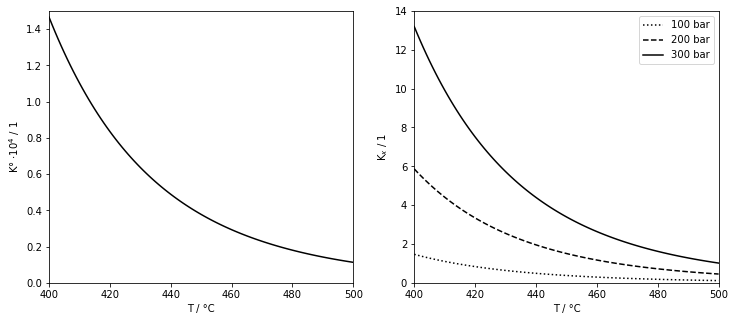

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(T_range-273.15, K_S(T_range)*1e4, color='black')
ax1.set_xlabel("T / °C")
ax1.set_ylabel("K$°$ $\cdot 10^{4}$ / 1")
ax1.set_xlim(400,500)
ax1.set_ylim(0,1.5)

ax2.plot(T_range-273.15, K_x(T_range, 100e5), color='black', linestyle='dotted', label="100 bar")
ax2.plot(T_range-273.15, K_x(T_range, 200e5), color='black', linestyle='dashed', label="200 bar")
ax2.plot(T_range-273.15, K_x(T_range, 300e5), color='black', linestyle='solid', label="300 bar")
ax2.set_xlabel("T / °C")
ax2.set_ylabel("K$_{x}$ / 1")
ax2.set_xlim(400,500)
ax2.set_ylim(0,14)
ax2.legend(loc='best')

plt.show()

Die Berechnungsergebnisse sind ebenfalls im Lehrbuch in Abbildung 4.1 auf Seite 43 dargestellt.